In [1]:
import sys
import geopandas as gpd
import pandas as pd

In [4]:
italy = gpd.read_file('map/reg2011_g.shp')
new_regions = pd.read_csv('map/reg2011_g.csv')
covid = pd.read_csv('map/Covid.csv')

<AxesSubplot:>

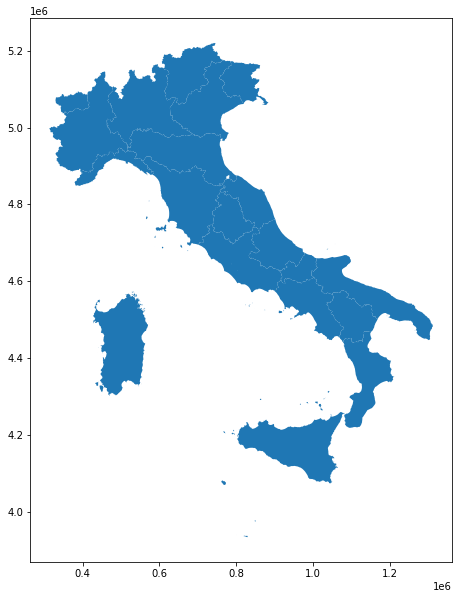

In [5]:
italy.plot(figsize=(10, 10))

In [6]:
italy.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,PIEMONTE,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,VALLE D'AOSTA/VALLÉE D'AOSTE\r\nVALLE D'AOSTA/...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,LOMBARDIA,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,VENETO,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


In [7]:
new_regions.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area
0,1,Piemonte,1.236869e+06,2.539410e+10
1,2,Aosta,3.111651e+05,3.259041e+09
2,3,Lombardia,1.411265e+06,2.386270e+10
3,4,Trentino,8.005341e+05,1.360802e+10
4,5,Veneto,1.057856e+06,1.840550e+10


In [8]:
covid.head()

,NOME_REG,Confirmed,Death
0,Lombardia,72889.0,13325.0
1,Piemonte,24832.0,2823.0
2,Emilia-Romagna,24450.0,3386.0
3,Veneto,17471.0,1315.0
4,Toscana,9147.0,778.0


In [9]:
italy['NOME_REG'] = new_regions['NOME_REG']

In [10]:
merge = italy.merge(covid, on='NOME_REG', how='right')
merge.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Confirmed,Death
0,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",72889.0,13325.0
1,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",24832.0,2823.0
2,8,Emilia-Romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",24450.0,3386.0
3,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",17471.0,1315.0
4,9,Toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",9147.0,778.0


In [11]:
merge['Ratio'] = merge['Death'] / merge['Confirmed']
merge.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Confirmed,Death,Ratio
0,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",72889.0,13325.0,0.182812
1,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",24832.0,2823.0,0.113684
2,8,Emilia-Romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",24450.0,3386.0,0.138487
3,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",17471.0,1315.0,0.075268
4,9,Toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",9147.0,778.0,0.085055


<AxesSubplot:title={'center':'Ratio'}>

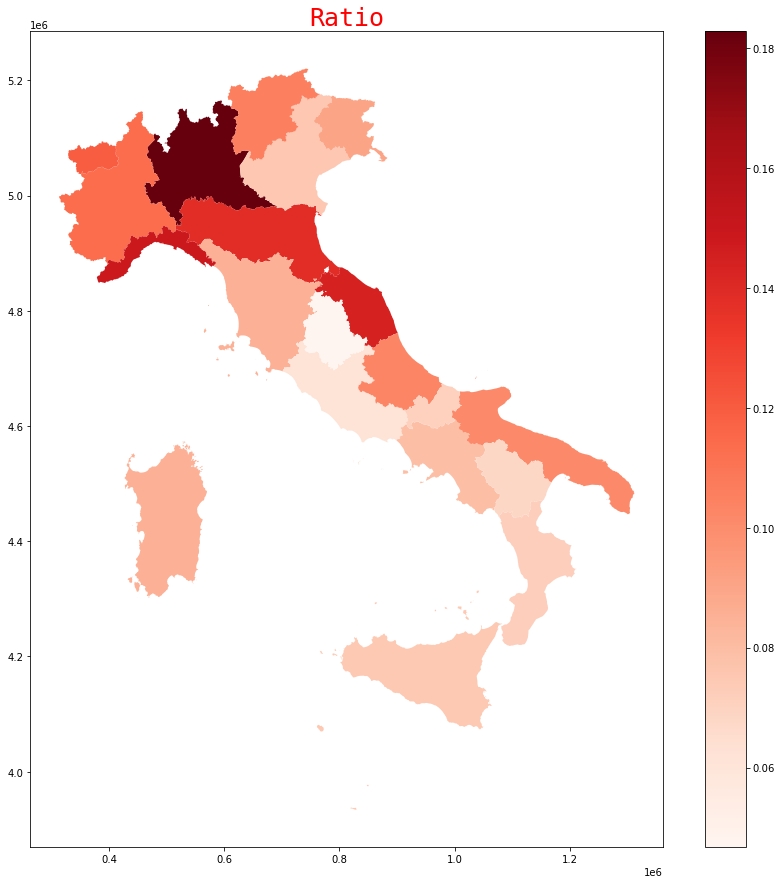

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(15, 15))
col = 'Ratio'
ax.set_title(
col, 
fontdict={'fontsize':25, 'fontweight':3}, 
color='Red', 
fontfamily='monospace')

merge.plot(
ax=ax,
column=col,
cmap='Reds',
label='ciao',
legend=True,
categorical=False
)